<a href="https://colab.research.google.com/github/Stitaprajna/Practise-codes/blob/main/DL_Stocks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In[2]:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


import the libraries as shown below

In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

re-size all the images to this

In [ ]:
IMAGE_SIZE = [224, 224]

In [ ]:
# Extracting the files and Labelling the images 
import glob
path = "/content/drive/MyDrive/DL_Analysis/Holding_position"
holding_positions = glob.glob(path + '/*.jpg')
hp = {}
for i in range(len(holding_positions)):
  hp[holding_positions[i]] = [1,0,0]

path1 = "/content/drive/MyDrive/DL_Analysis/Bearish"
bearish = glob.glob(path1 + '/*.jpg')
ber = {}
for i in range(len(bearish)):
  ber[bearish[i]] = [0,1,0]

path2 = "/content/drive/MyDrive/DL_Analysis/Bullish"
bullish = glob.glob(path2 + '/*.jpg')

bul = {}
for i in range(len(bullish)):
  ber[bullish[i]] = [0,0,1]

In [ ]:
# Merging the Dictionaries
for key,value in bul.items():
  ber[key] = value

for keys,values in ber.items():
  hp[keys] = values

In [ ]:
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

### Don't train existing weights

In [ ]:
for layer in inception.layers:
    layer.trainable = False

useful for getting number of output classes

#### Our layers - you can add more if you want

In [ ]:
x = Flatten()(inception.output)

In [ ]:
prediction = Dense(3, activation='softmax')(x)

## Create a model object

In [ ]:
model = Model(inputs=inception.input, outputs=prediction)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In[47]:

In [ ]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
# Separating the file locations and labels from the dictionaries
keys = []
for i in hp.keys():
  keys.append(i)
values = []
for i in hp.values():
  values.append(i)

In [ ]:
# x is just the file names here
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(keys,values, test_size=0.3)

In [ ]:
# Reading the train image files
import cv2
x_train_img = []
for i in range(len(x_train)):
  x_train_img.append(cv2.imread(x_train[i]))

In [ ]:
# Reading the test image files
x_test_img = []
for i in range(len(x_test)):
  x_test_img.append(cv2.imread(x_test[i]))

Make sure you provide the same target size as initialied for the image sizen

In [ ]:
# Resize the train images
x_train_resized = []
for i in range(len(x_train_img)):
  x_train_resized.append(cv2.resize(x_train_img[i],(224,224)))

In [ ]:
# Resize the test images
x_test_resized = []
for i in range(len(x_test_img)):
  x_test_resized.append(cv2.resize(x_test_img[i],(224,224)))

In [ ]:
x_train_f = np.array(x_train_resized, dtype='float')/255.0
y_train = np.array(y_train)

In [ ]:
x_test_f = np.array(x_test_resized, dtype='float')/255.0
y_test = np.array(y_test)

fit the model<br>
Run the cell. It will take some time to execute

In [ ]:
r = model.fit(np.asarray(x_train_f).astype('float'), np.asarray(y_train).astype('float'),epochs=10)

Epoch 1/10
12/12 [==============================] - 36s 3s/step - loss: 0.0124 - accuracy: 0.9972
Epoch 2/10
12/12 [==============================] - 36s 3s/step - loss: 0.0257 - accuracy: 0.9944
Epoch 3/10
12/12 [==============================] - 36s 3s/step - loss: 0.1137 - accuracy: 0.9944
Epoch 4/10
12/12 [==============================] - 36s 3s/step - loss: 0.1279 - accuracy: 0.9861
Epoch 5/10
12/12 [==============================] - 36s 3s/step - loss: 0.0775 - accuracy: 0.9944
Epoch 6/10
12/12 [==============================] - 36s 3s/step - loss: 0.0560 - accuracy: 0.9944
Epoch 7/10
12/12 [==============================] - 36s 3s/step - loss: 0.0847 - accuracy: 0.9889
Epoch 8/10
12/12 [==============================] - 36s 3s/step - loss: 0.0375 - accuracy: 0.9944
Epoch 9/10
12/12 [==============================] - 36s 3s/step - loss: 0.0864 - accuracy: 0.9944
Epoch 10/10
12/12 [==============================] - 36s 3s/step - loss: 0.0792 - accuracy: 0.9944


In [ ]:
model.evaluate(x_test_f,y_test)

5/5 [==============================] - 15s 3s/step - loss: 0.6873 - accuracy: 0.8831


[0.6873392462730408, 0.8831169009208679]

In [ ]:
import matplotlib.pyplot as plt
len(y_test)

154

### Plot the loss

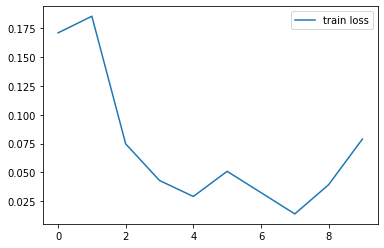

In [ ]:
plt.plot(r.history['loss'], label='train loss')
#plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
#plt.savefig('LossVal_loss')

plot the accuracy

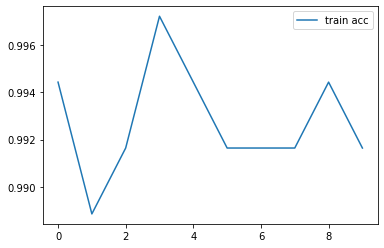

In [ ]:
plt.plot(r.history['accuracy'], label='train acc')
#plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
#plt.savefig('AccVal_acc')

In [ ]:
y_pred = model.predict(x_test_f)

In [ ]:
t1 = np.argmax(y_pred, axis=1)

In [ ]:
t2 = np.argmax(y_test, axis=1)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(t2,t1)

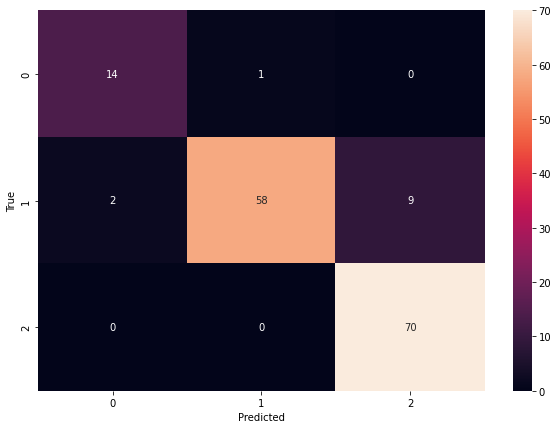

In [ ]:
#from tensorflow.keras.models import load_model
import seaborn as sn
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.rcParams['figure.figsize'] = [10,7]
plt.show()

## Model saving and Prediction on New Data

In [ ]:
# Save the model
model.save('Stock_Predictor.h5')
from keras.models import load_model 

In [ ]:
import cv2
import pickle
import numpy as np

def load_model(pickel_file):
  pickle_in = open(pickel_file,'rb')
  model1 = pickle.load(pickle_in)
  return model1

In [ ]:
def stock_predictor(url):
  today = cv2.imread(url)
  today_resized = cv2.resize(today,[224,224])
  today_f = np.array(today_resized, dtype='float')/255.0
  today_f = np.reshape(today_f,(1,224,224,3))
  Model1 = load_model('Stock_Predictor.h5')
  f = Model1.predict(today_f)
  aaa = np.argmax(f,axis=1)
  if aaa[0] ==0:
    return 'Holding'
  elif aaa[0] == 1:
    return 'Bearish'
  else:
    return 'Bullish'

In[59]:

In [ ]:
stock_predictor('/content/yest.png')

'Bullish'

In [ ]:
a = cv2.imread('/content/today3.png')

In [ ]:
type(a)

numpy.ndarray